In [16]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
df_combined = pd.merge(df_clinical_trial,df_mouse_drug, how= "inner", on ="Mouse ID")[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
# Display the data table for preview
df_combined.head()



Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           45.651331
2  Capomulin         10           43.270852
3  Capomulin         15           43.784893
4  Capomulin         20           42.731552

## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_data_grp = df_combined.groupby(by=['Drug','Timepoint'])
# Convert to DataFrame
df_volume = pd.DataFrame(df_data_grp["Tumor Volume (mm3)"].mean()).reset_index()
# Preview DataFrame
df_volume.head()


Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
df_sem = pd.DataFrame(df_data_grp["Tumor Volume (mm3)"].sem()).reset_index()

# Preview DataFrame
df_sem.head()



Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [19]:
# Minor Data Munging to Re-Format the Data Frames
df_volume_reform = df_volume.pivot(index = "Timepoint", columns="Drug",values='Tumor Volume (mm3)')
df_sem_reform = df_sem.pivot(index = "Timepoint", columns="Drug",values='Tumor Volume (mm3)')


# Preview that Reformatting worked
df_volume_reform = df_volume_reform.reset_index()
df_sem_reform = df_sem_reform.reset_index()
df_volume_reform.head()



Drug  Timepoint  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
0             0  45.000000  45.000000  45.000000  45.000000  45.000000   
1             5  44.266086  46.503051  47.062001  47.389175  46.796098   
2            10  43.084291  48.285125  49.403909  49.582269  48.694210   
3            15  42.064317  50.094055  51.296397  52.399974  50.933018   
4            20  40.716325  52.157049  53.197691  54.920935  53.644087   

Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334

<IPython.core.display.Javascript object>


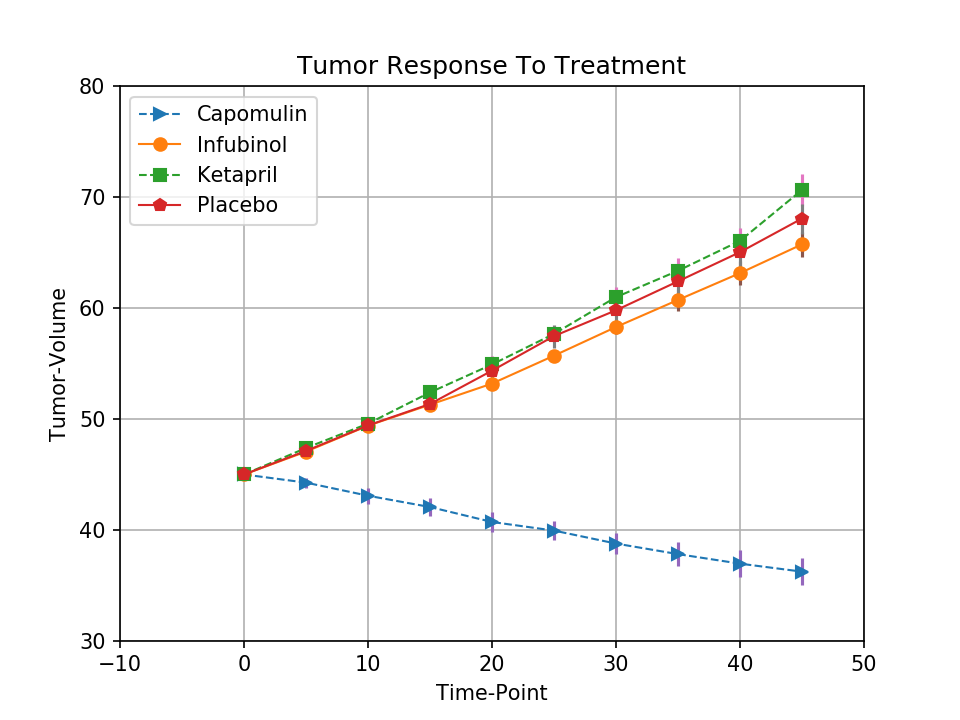

(30, 80)

In [47]:
# Generate the Plot (with Error Bars)

#df_volume_reform.head()
#
plt.xlabel('Time-Point')
plt.ylabel('Tumor-Volume')
plt.title("Tumor Response To Treatment")

Capomulin, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Capomulin'],'--', marker = '>' ,label= 'Capomulin', linewidth = 1)
Infubinol, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Infubinol'], marker = 'o',label= 'Infubinol', linewidth = 1)
Ketapril, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Ketapril'],'--', marker='s', label= 'Ketapril', linewidth = 1)
Placebo, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Placebo'], marker='p', label= 'Placebo', linewidth = 1)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc ="best")

plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Capomulin'], yerr= df_sem_reform['Capomulin'], fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Infubinol'], yerr= df_sem_reform['Infubinol'],fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Ketapril'], yerr= df_sem_reform['Ketapril'],fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Placebo'], yerr= df_sem_reform['Placebo'],fmt='none')

plt.grid(True)
plt.xlim(-10,50)
plt.ylim(30,80)


In [142]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


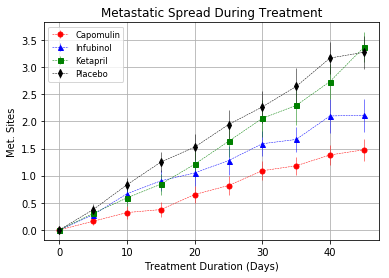

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

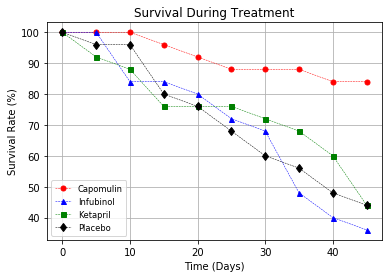

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

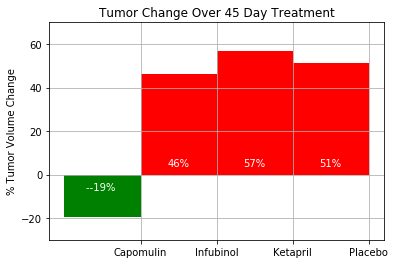